In [2]:
from __future__ import print_function
import numpy as np
from scipy import stats
import pandas as pd
import matplotlib
import pylab as pl
matplotlib.use('qt4agg')  # Can also use 'tkagg' or 'webagg'

import statsmodels.api as sm

import os
import json
s = json.load(open('../fbb_matplotlibrc.json'));
pl.rcParams.update(s)

%pylab inline

Populating the interactive namespace from numpy and matplotlib


//anaconda/envs/GEOP/lib/python3.6/site-packages/ipykernel_launcher.py:7: UserWarning: matplotlib.pyplot as already been imported, this call will have no effect.
  import sys
//anaconda/envs/GEOP/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


# creating synthetic time series with specific stationarity properties


Text(0, 0.5, 'y')

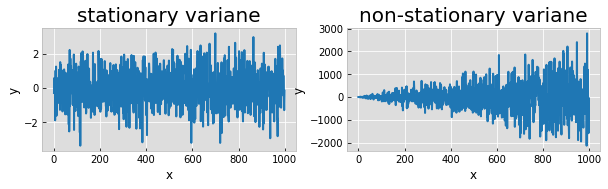

In [37]:
np.seed=310

fig = pl.figure(figsize=(10, 5))
ax1 = fig.add_subplot(221)
ax2 = fig.add_subplot(222)

x1 = np.random.randn(1000)
x2 = np.random.randn(1000) * np.arange(0., 1000, 1.0)
ax1.plot(np.random.randn(1000))
ax2.plot(np.random.randn(1000) * np.arange(1000))
ax1.set_title("stationary variane", fontsize=20)
ax2.set_title("non-stationary variane", fontsize=20)
ax1.set_xlabel('x')
ax2.set_xlabel('x')
ax1.set_ylabel('y')
ax2.set_ylabel('y')


//anaconda/envs/GEOP/lib/python3.6/site-packages/ipykernel_launcher.py:12: FutureWarning: pd.rolling_mean is deprecated for DataFrame and will be removed in a future version, replace with 
	DataFrame.rolling(window=20,center=False).mean()
  if sys.path[0] == '':
//anaconda/envs/GEOP/lib/python3.6/site-packages/ipykernel_launcher.py:15: FutureWarning: pd.rolling_mean is deprecated for DataFrame and will be removed in a future version, replace with 
	DataFrame.rolling(window=20,center=False).mean()
  from ipykernel import kernelapp as app
//anaconda/envs/GEOP/lib/python3.6/site-packages/ipykernel_launcher.py:29: FutureWarning: pd.rolling_std is deprecated for DataFrame and will be removed in a future version, replace with 
	DataFrame.rolling(window=20,center=False).std()
//anaconda/envs/GEOP/lib/python3.6/site-packages/ipykernel_launcher.py:32: FutureWarning: pd.rolling_std is deprecated for DataFrame and will be removed in a future version, replace with 
	DataFrame.rolling(window=20,cen

Text(0, 0.5, 'y')

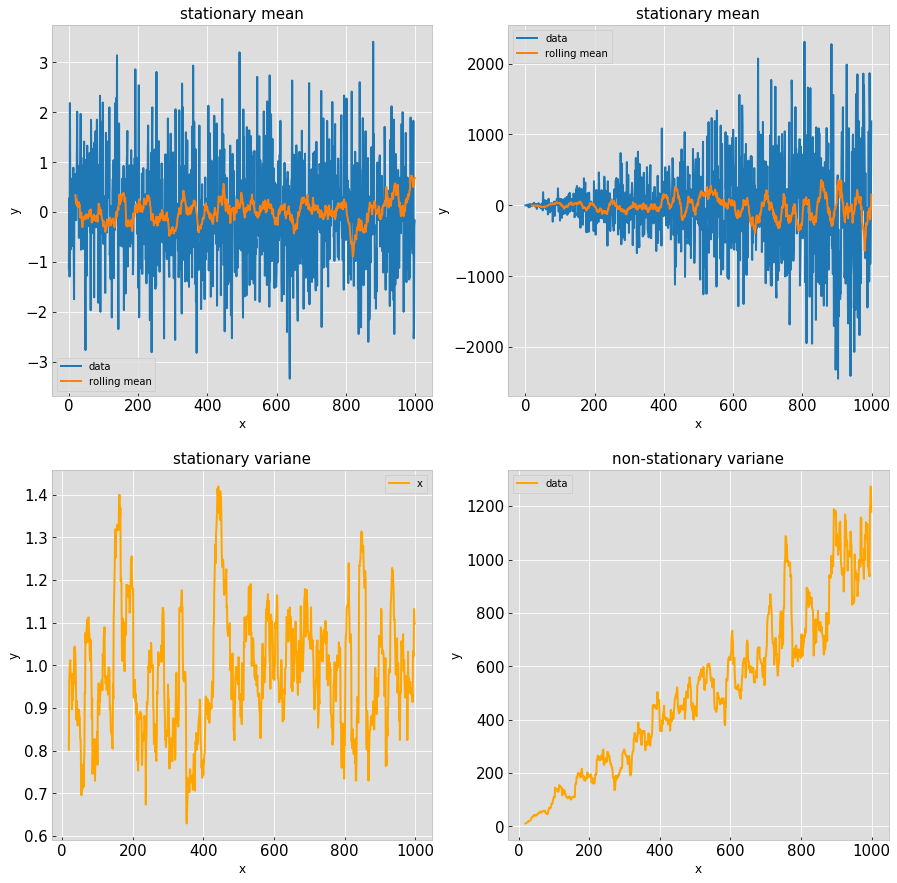

In [38]:
fig = pl.figure(figsize=(10, 5))
ax1 = fig.add_subplot(221)
ax2 = fig.add_subplot(222)

x1 = np.random.randn(1000)
x2 = np.random.randn(1000) * np.arange(0., 1000, 1.0)
ax1.plot(np.random.randn(1000))
ax2.plot(np.random.randn(1000) * np.arange(1000))
ax1.set_title("stationary variane", fontsize=15)
ax2.set_title("non-stationary variane", fontsize=15)

ax1 = pd.rolling_mean(pd.DataFrame({'x': x1}), 20).plot(figsize=(15,15), 
                                                       fontsize=15, ax=ax1)
ax1.legend(["data", "rolling mean"])
ax2 = pd.rolling_mean(pd.DataFrame({'x': x2}), 20).plot(figsize=(15,15), 
                                                       fontsize=15, ax=ax2)

ax1.set_title("stationary mean", fontsize=15)
ax2.set_title("stationary mean", fontsize=15)
ax2.legend(["data", "rolling mean"])
ax1.set_xlabel('x')
ax2.set_xlabel('x')
ax1.set_ylabel('y')
ax2.set_ylabel('y')


ax1 = fig.add_subplot(223)
ax2 = fig.add_subplot(224)
ax1 = pd.rolling_std(pd.DataFrame({'x':x1}), 20).plot(figsize=(15,15), ax=ax1, 
                                                      fontsize=15, color='orange')
ax2.legend(["data", "rolling stdev"])
ax2 = pd.rolling_std(pd.DataFrame({'x':x2}), 20).plot(figsize=(15,15), ax=ax2, 
                                                      fontsize=15, color='orange')
ax2.legend(["data", "rolling stdev"])
ax1.set_title("stationary variane", fontsize=15)
ax2.set_title("non-stationary variane", fontsize=15);
ax1.set_xlabel('x')
ax2.set_xlabel('x')
ax1.set_ylabel('y')
ax2.set_ylabel('y')


# Formal tests to see if these time series are stationary e.g.: ADFuller test
[https://en.wikipedia.org/wiki/Augmented_Dickey%E2%80%93Fuller_test]
Null hypothsis: there is a "unit root": i.e. the series is not stationary [http://statsmodels.sourceforge.net/devel/generated/statsmodels.tsa.stattools.adfuller.html]


sm.tsa.adfuller?:
The null hypothesis of the Augmented Dickey-Fuller is that there is a unit root, 
with the alternative that there is no unit root. If the pvalue is above a critical size, 
then we cannot reject that there is a unit root. 
No unit root generally means stationarity

Stationarity tests allow verifying whether a series is stationary or not. There are two different approaches: some tests consider as null hypothesis H0 that the series is stationary (KPSS test, Leybourne and McCabe test), and for other tests, on the opposite, the null hypothesis is on the contrary that the series is not stationary (Dickey-Fuller test, augmented Dickey-Fuller test, Phillips-Perron test, DF-GLS test.


([ref](https://www.xlstat.com/en/solutions/features/unit-root-and-stationarity-tests))


In [39]:
st = np.random.randn(1000)
nonst = np.random.randn(1000) + np.arange(0., 10, 0.01)
nonstvar = np.random.randn(1000) * np.arange(0., 10, 0.01)

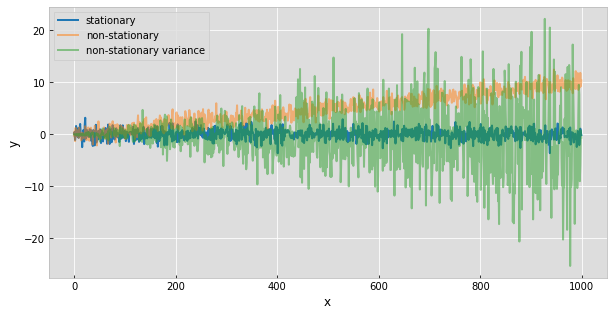

In [41]:
pl.figure(figsize=(10,5))
pl.plot(range(1000), st, label="stationary")
pl.plot(range(1000), nonst, label="non-stationary", alpha=0.5)
pl.plot(range(1000), nonstvar, label="non-stationary variance", alpha=0.5)
pl.xlabel("x")
pl.ylabel("y")
pl.legend();

In [42]:
print ("SYNTHETIC STATIONARY DATA\n\n")
print ("synthetic stationary data {0:.2f}".format(sm.tsa.adfuller(st)[1]),
       sm.tsa.adfuller(st) )
print ("synthetic nonstationary data {0:.2f}".format(sm.tsa.adfuller(nonst)[1]),
       sm.tsa.adfuller(nonst) )
print ("synthetic nonstationary variance data {0:.2f}".format(sm.tsa.adfuller(nonstvar)[1]),
       sm.tsa.adfuller(nonstvar) )

SYNTHETIC STATIONARY DATA


synthetic stationary data 0.00 (-33.44857511257207, 0.0, 0, 999, {'1%': -3.4369127451400474, '5%': -2.864437475834273, '10%': -2.568312754566378}, 2729.016811632712)
synthetic nonstationary data 0.90 (-0.4561688742411558, 0.9002897948049358, 16, 983, {'1%': -3.4370198458812156, '5%': -2.864484708707697, '10%': -2.568337912084273}, 2844.0029052728623)
synthetic nonstationary variance data 0.00 (-15.03430414748261, 9.799776552365231e-28, 5, 994, {'1%': -3.43694584277544, '5%': -2.8644520725172873, '10%': -2.5683205291305176}, 6143.234914900236)


# this of course does not apply only to time series!

In [43]:
print (sm.datasets.cancer.NOTE)

::

    Number of observations: 301
    Number of variables: 2
    Variable name definitions:

        cancer - The number of breast cancer observances
        population - The population of the county




In [44]:
cdata = sm.datasets.cancer.load_pandas().data

In [45]:
cdata.describe()

,cancer,population
count,301.000000,301.000000
mean,39.857143,11288.056478
std,50.977801,13780.010088
min,0.000000,445.000000
25%,11.000000,2935.000000
50%,22.000000,6445.000000
75%,48.000000,13989.000000
max,360.000000,88456.000000


In [46]:
cdata.head()

,cancer,population
0,1.0,445.0
1,0.0,559.0
2,3.0,677.0
3,4.0,681.0
4,3.0,746.0


//anaconda/envs/GEOP/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: pandas.scatter_matrix is deprecated. Use pandas.plotting.scatter_matrix instead
  """Entry point for launching an IPython kernel.


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1c1f547668>,
      dtype=object)

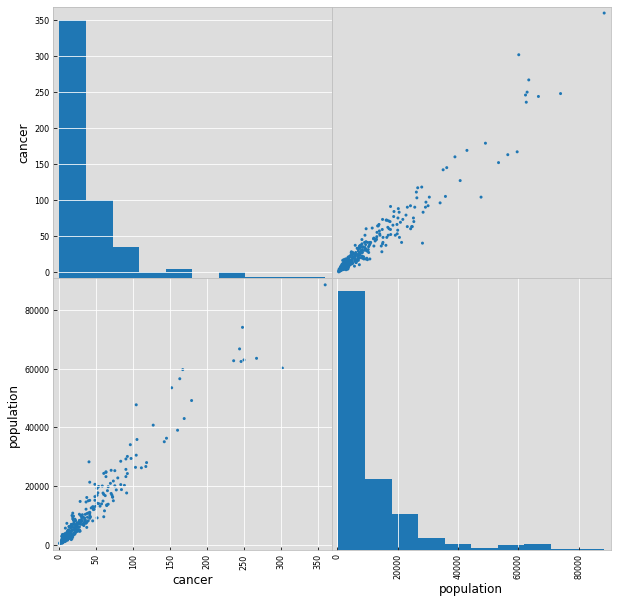

In [47]:
pd.scatter_matrix(cdata, figsize(10,10))

//anaconda/envs/GEOP/lib/python3.6/site-packages/ipykernel_launcher.py:2: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=10,center=False).mean()
  


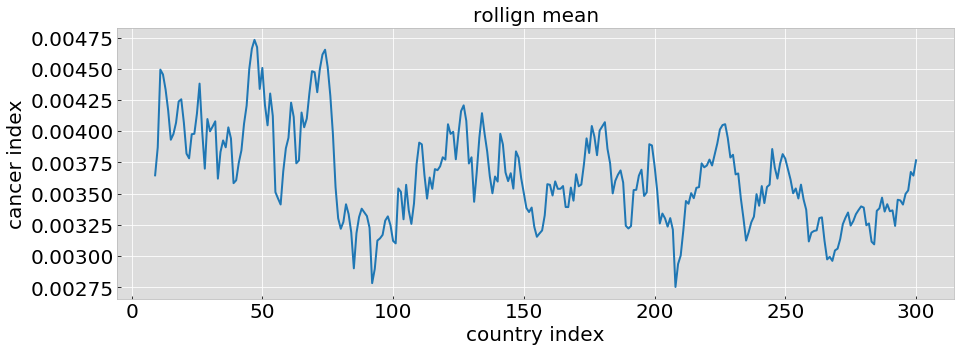

//anaconda/envs/GEOP/lib/python3.6/site-packages/ipykernel_launcher.py:8: FutureWarning: pd.rolling_std is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=10,center=False).std()
  


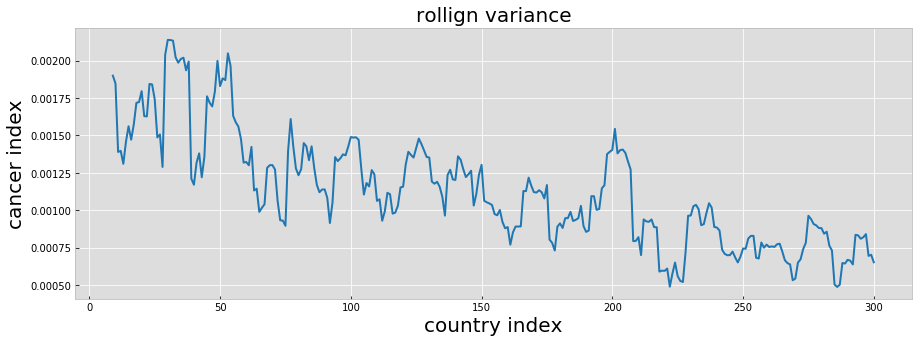

In [48]:
ax = pd.rolling_mean(cdata['cancer'] / cdata['population'], 
                     10).plot(figsize=(15,5), fontsize=20)
ax.set_title("rollign mean", fontsize=20)
ax.set_xlabel("country index", fontsize=20)
ax.set_ylabel("cancer index", fontsize=20)
pl.show()
ax = pd.rolling_std(cdata['cancer'] / cdata['population'], 
                    10).plot(figsize=(15,5))

ax.set_title("rollign variance", fontsize=20)
ax.set_xlabel("country index", fontsize=20)
ax.set_ylabel("cancer index", fontsize=20)
pl.show()


In [50]:
print ("AD Fuller test on cancer rate by country")
sm.tsa.adfuller (cdata['cancer'] / cdata['population'])

AD Fuller test on cancer rate by country


(-3.2124663237520505,
 0.019274324926640607,
 16,
 284,
 {'1%': -3.4535872903895797,
  '10%': -2.5722217283277127,
  '5%': -2.871771355211212},
 -3030.240952960556)